Let's use this notebook for some experiments. 

In [1]:
from NMF import *
%matplotlib inline

(1025, 523)


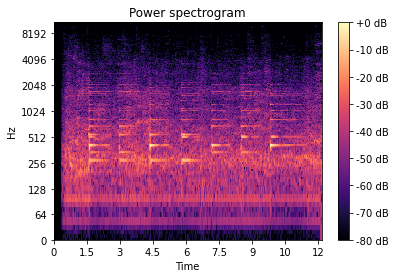

In [5]:
filename = './data/Chords.wav'
ViolinRecording = Recording(filename)
ViolinSpectrogram = ViolinRecording.compute_spectrogram()
ViolinSpectrogram.visualize()
# ViolinSpectrogram.restore_recording("./data/exp.wav")

**KL_NMF**

1. Time plot for first pitch 53 corresponds to pitch 72. F(53) * 3 + F(72)
2. Pitch 61 is alright
3. 67.2 ~ 68 is also ok in terms of time
4. 68 again
5. noize

So, 65 and 72 not detected. 68 splitted.

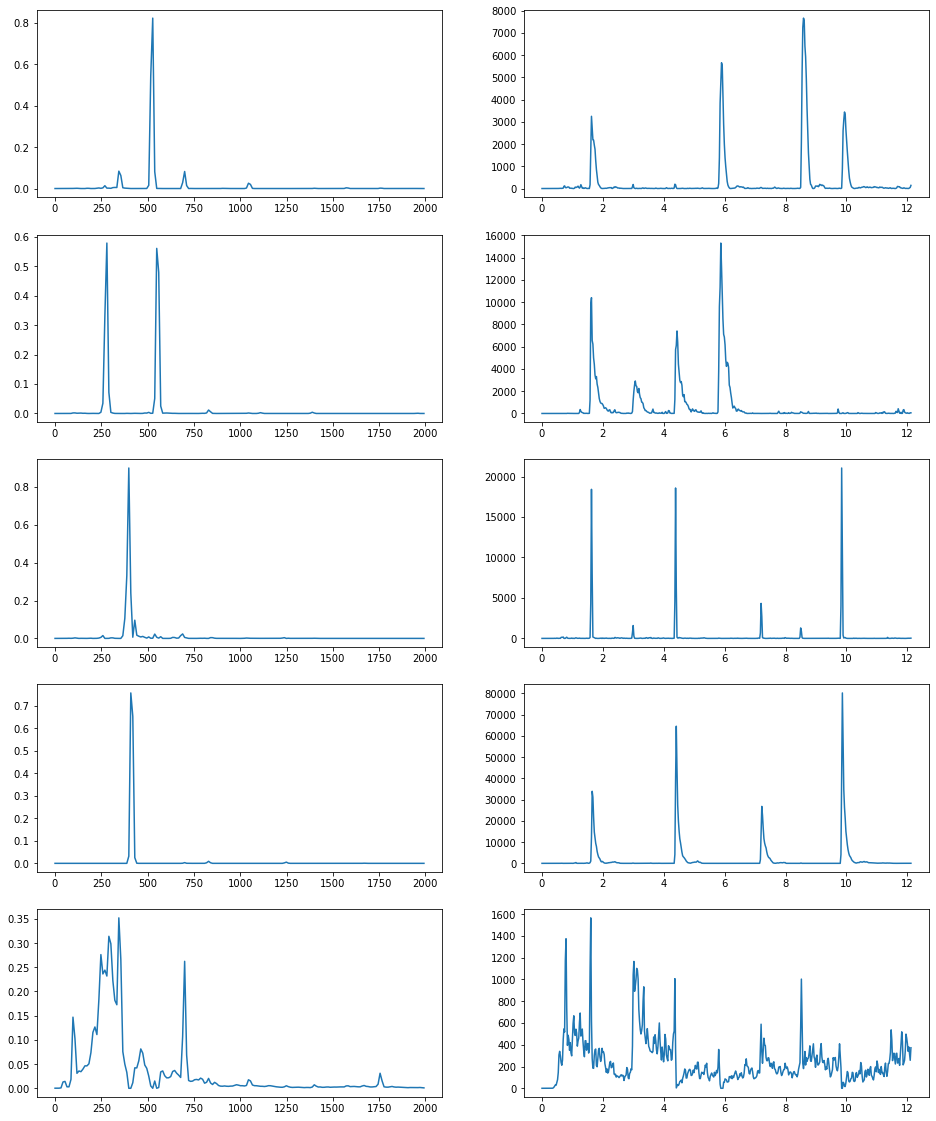

[ 53.   61.   67.2  68.  108.4]


In [3]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_KL(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000 iterations??

1. Again 53, but noizy time plot
2. Pitch 61
3. Pitch 61
4. 67.2
5. 68
6. Noize

So, 65 and 72 not detected. 61 and 68 splitted.

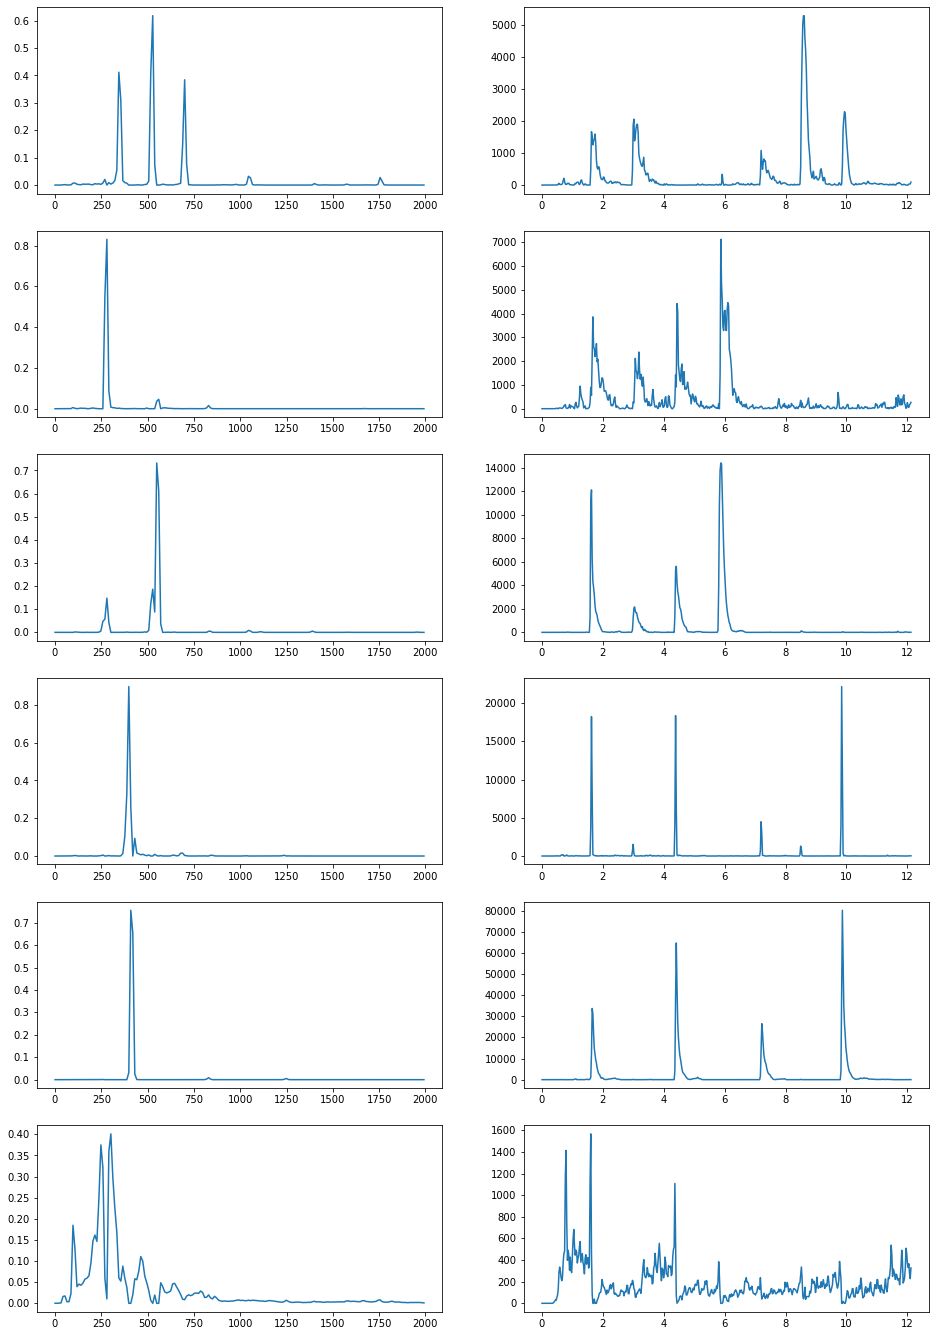

[ 53.   61.   61.   67.2  68.  108.4]


In [4]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_KL(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

1. Again 53, but noizy time plot
2. Pitch 61
3. Pitch 61
4. 67.2
5. 67.8
6. 68.2
7. Noize

So, 65 and 72 not detected. 61 and 68 splitted.

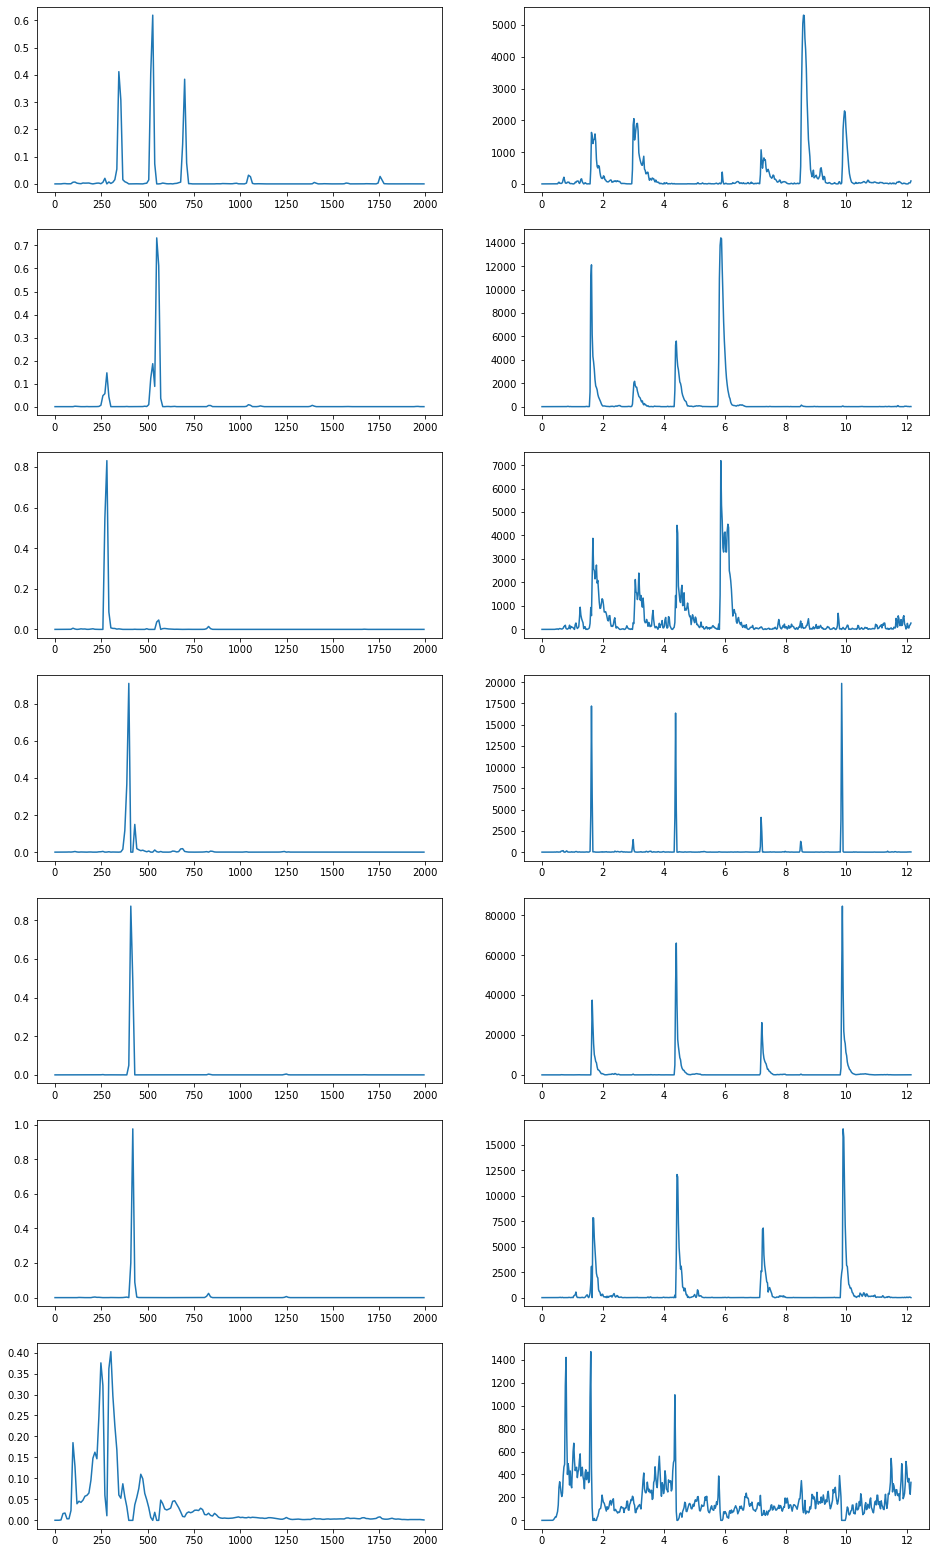

[ 53.   61.   61.   67.2  67.8  68.2 108.4]


In [5]:
K = 7
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_KL(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

1. 49???)))
2. Pitch 61
3. Pitch 61
4. 65!
5. ~68
6. ~68
7. 72!
8. Noize

So, 65 and 72 not detected. 61 and 68 splitted.

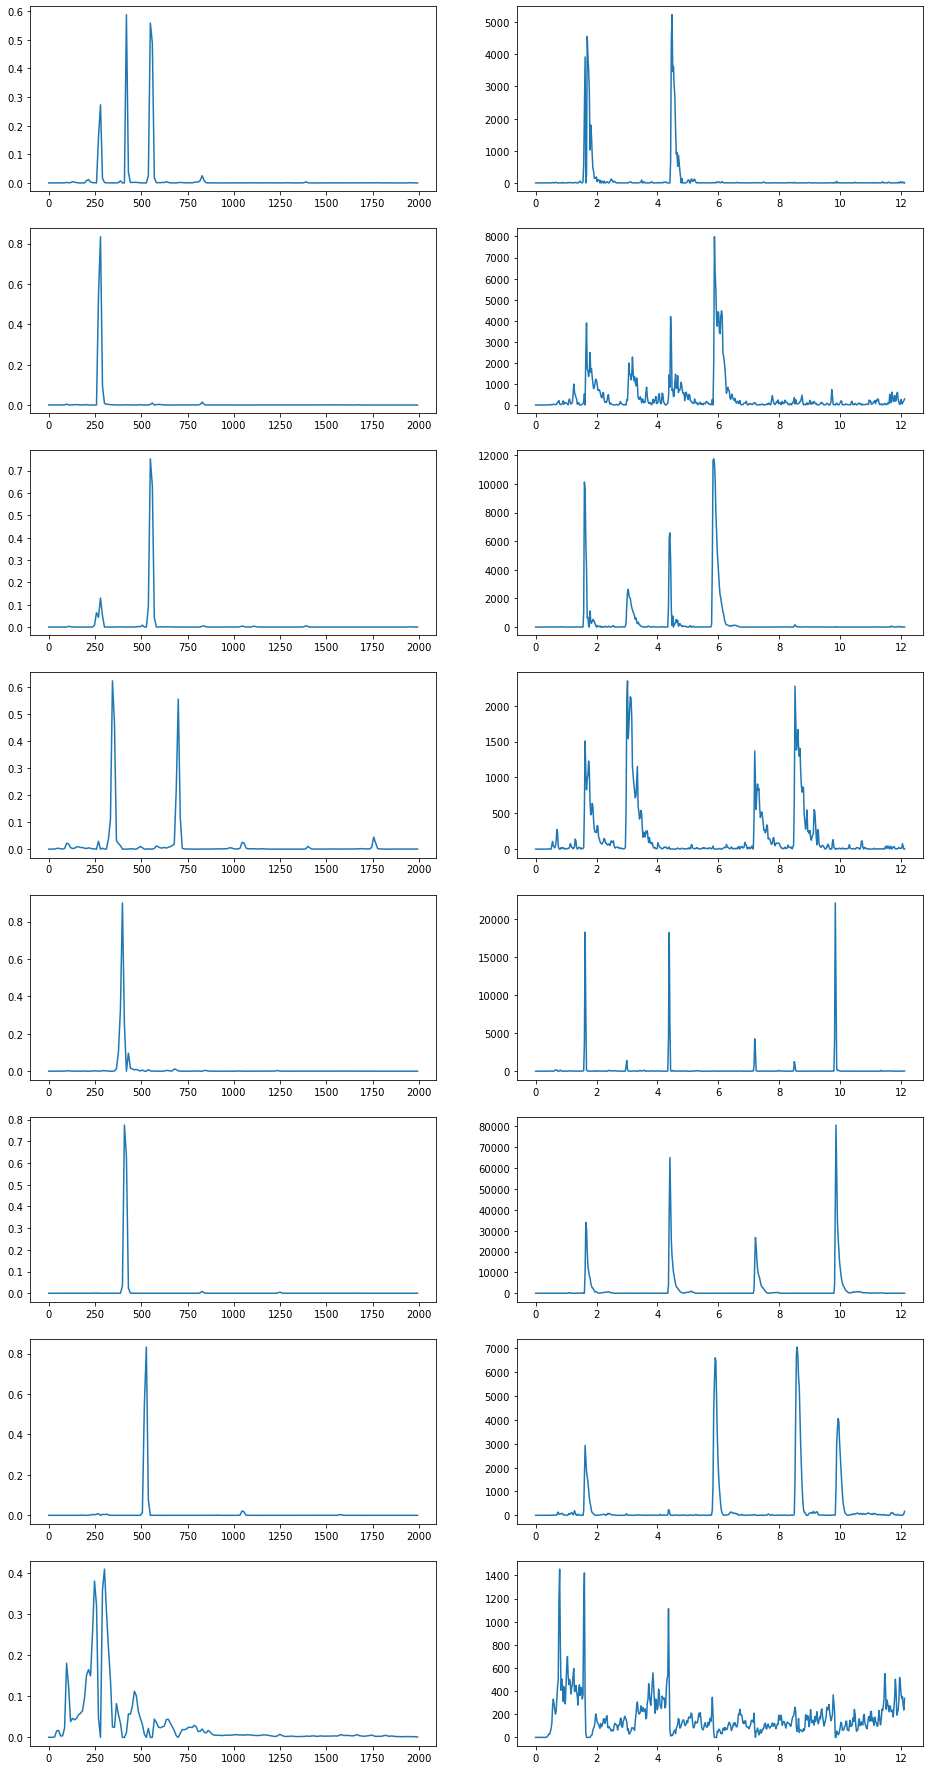

[ 49.   61.   61.   65.   67.2  68.   72.  108.4]


In [4]:
K = 8
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_KL(K, 7000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

**EUC_NMF**

1. Again 53 (is it the feature of the piano??)
2. Pitch 61
3. 
4. 
5. Splitted pitch 68c

No noize???

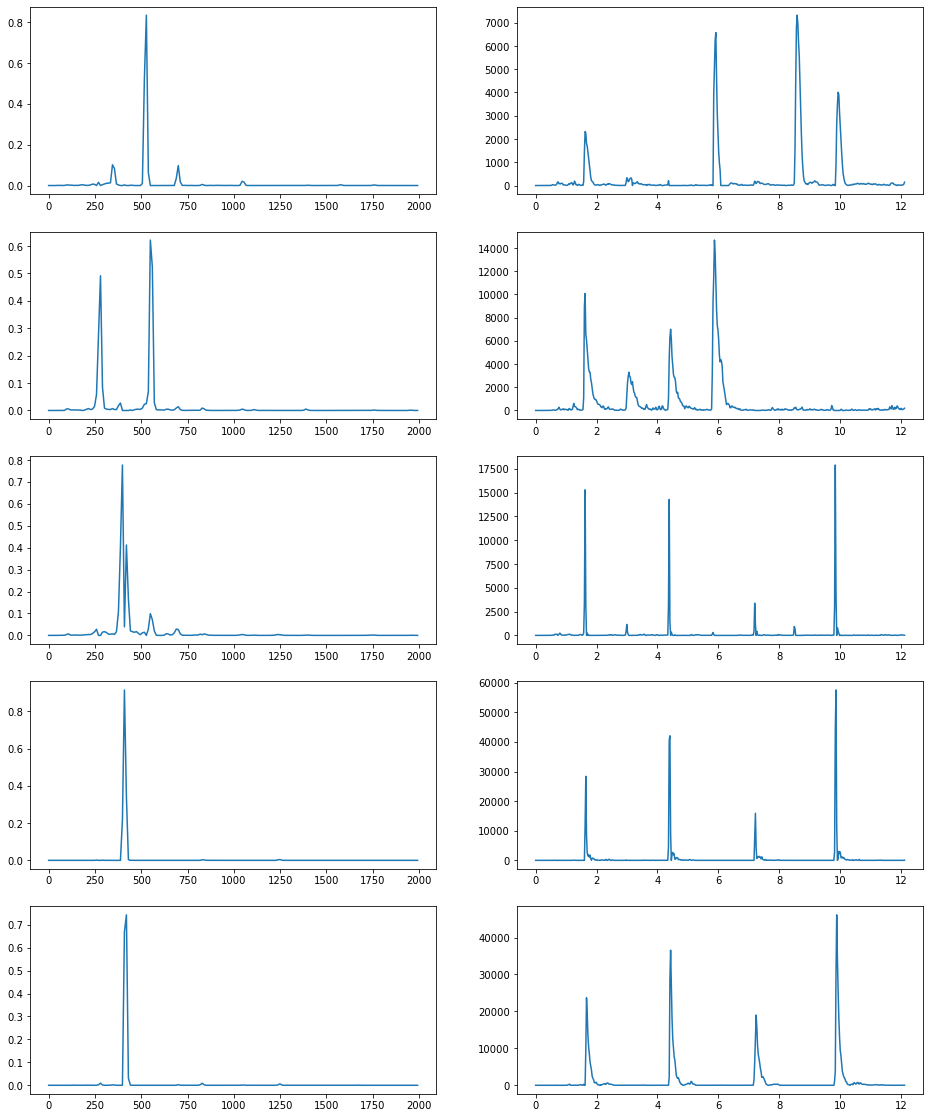

[53.  61.  67.4 67.8 68. ]


In [6]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EUC(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

1. Again 53
2. 
3. Pitch 61
4. 
5. 
6. Splitted pitch 68

No noize???

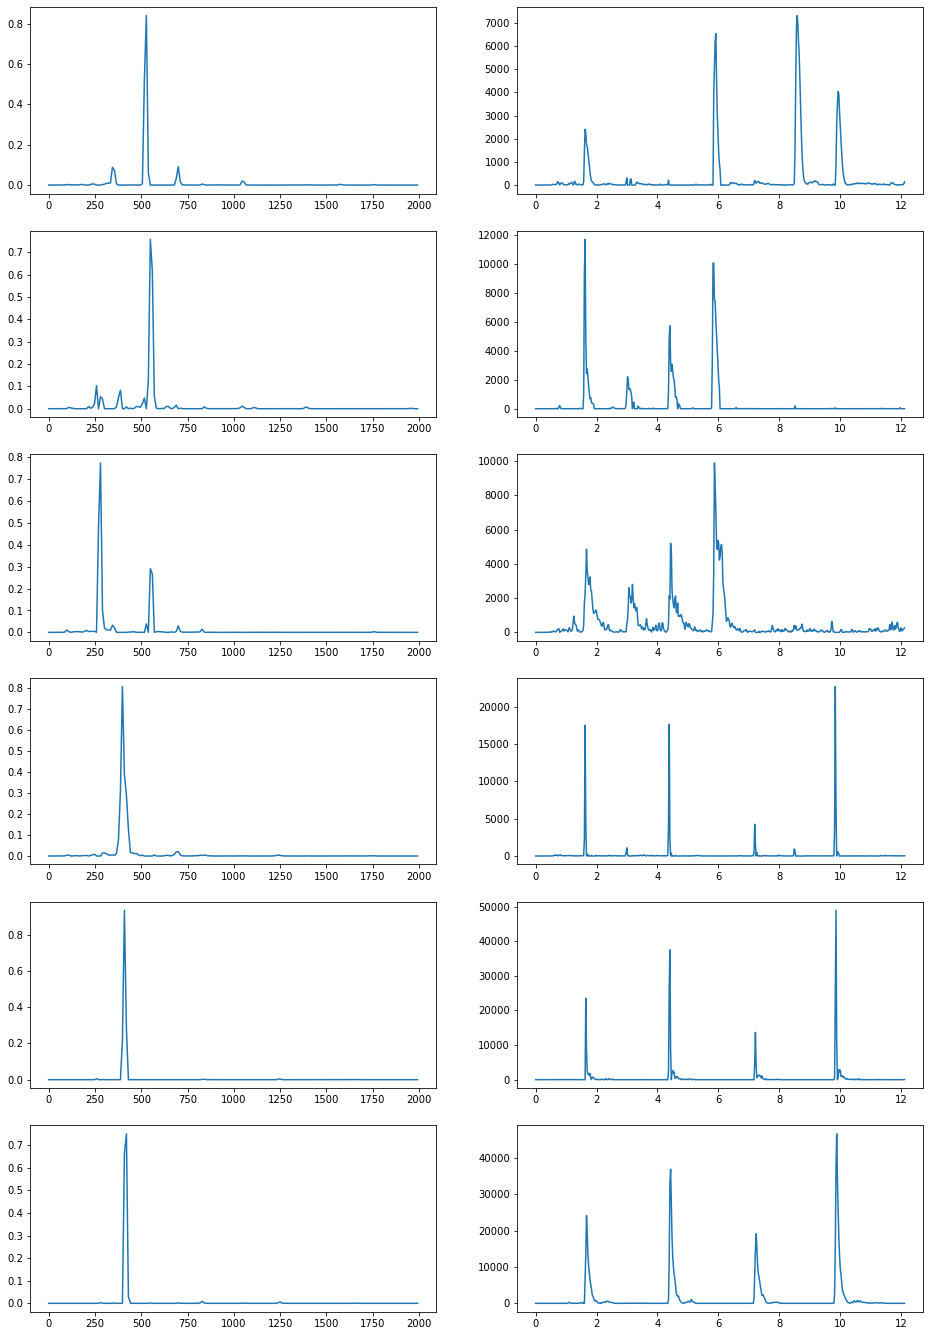

[53.  61.  61.  67.4 67.8 68. ]


In [7]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EUC(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

1. Again 53
2. 
3. Pitch 61
4. 
5. 
6. Splitted pitch 68
7. ???
No noize???

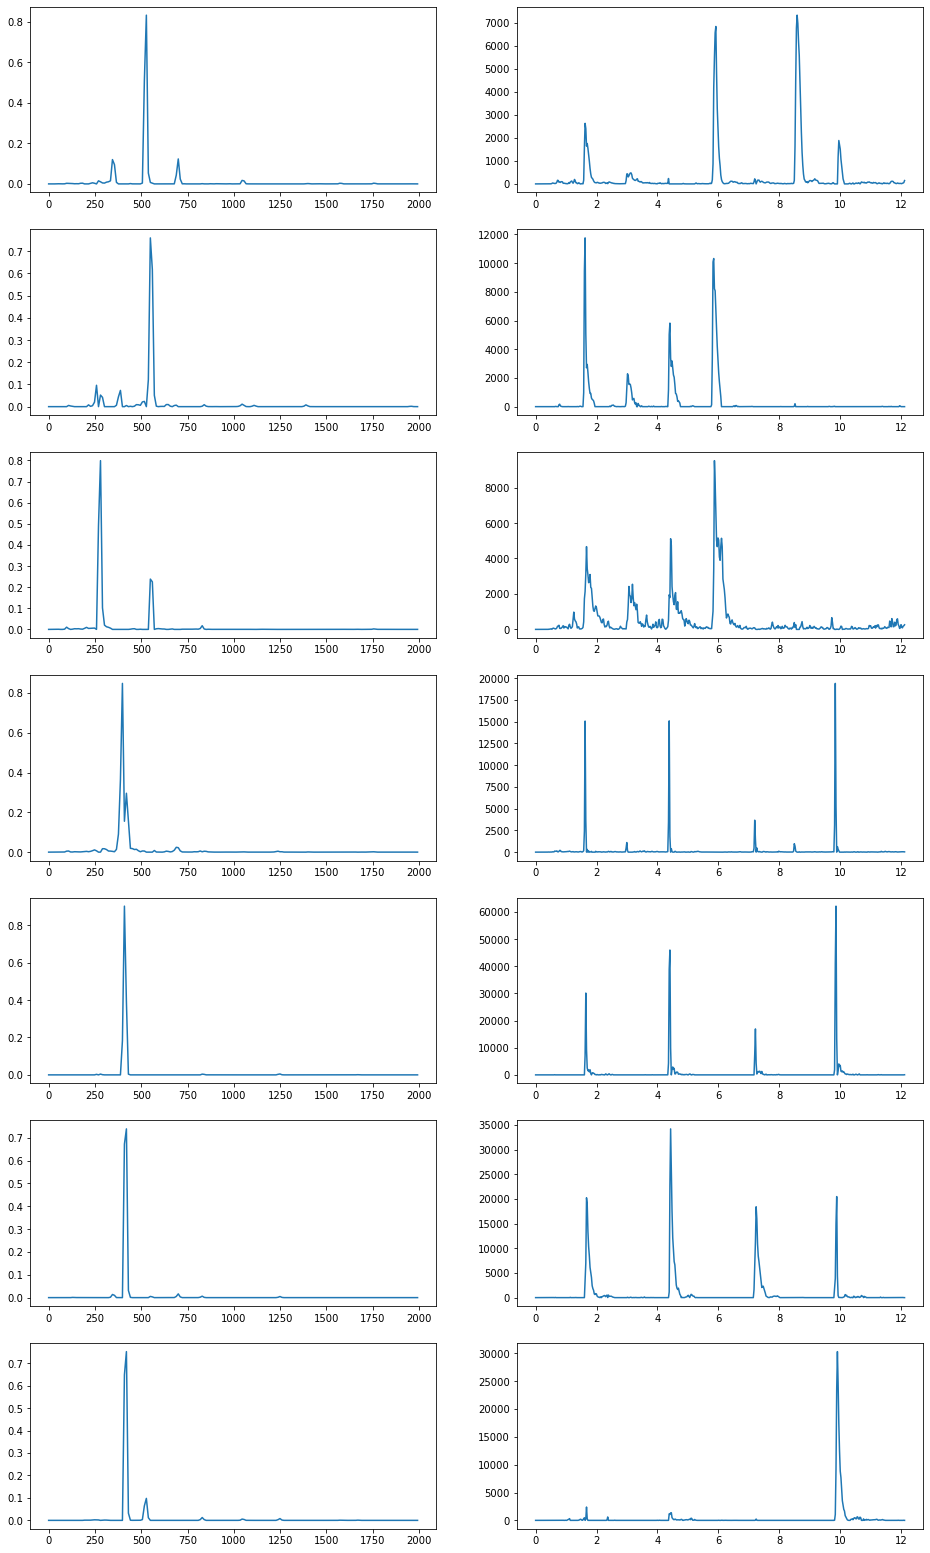

[53.  61.  61.  67.4 67.8 68.  68. ]


In [8]:
K = 7
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EUC(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

**MU_IS_NMF**

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. ???
3. ???
4. ???
5. ???


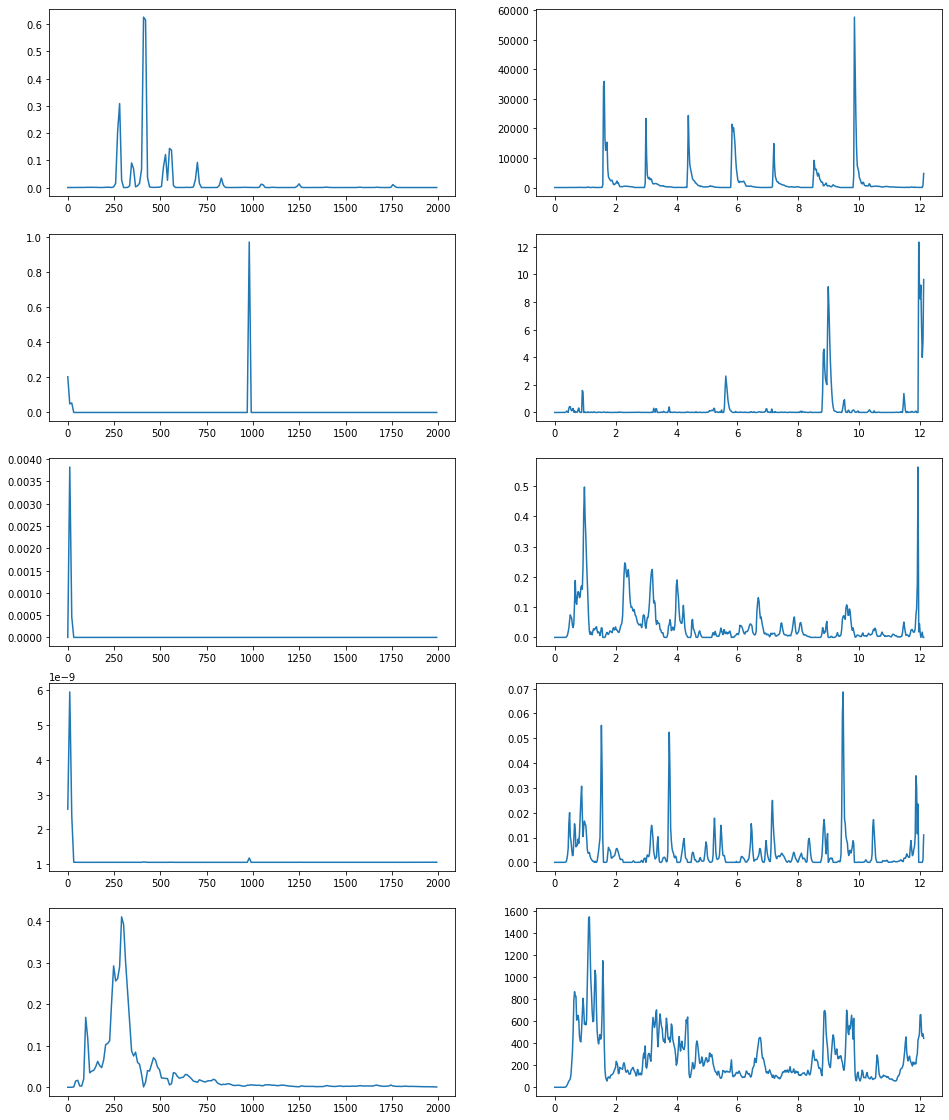

[ 49.   63.8 100.  107.2 108.4]


In [9]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_MU_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. 65 but what happened with time plot?
3. ???
4. ???
5. ???
6. ???

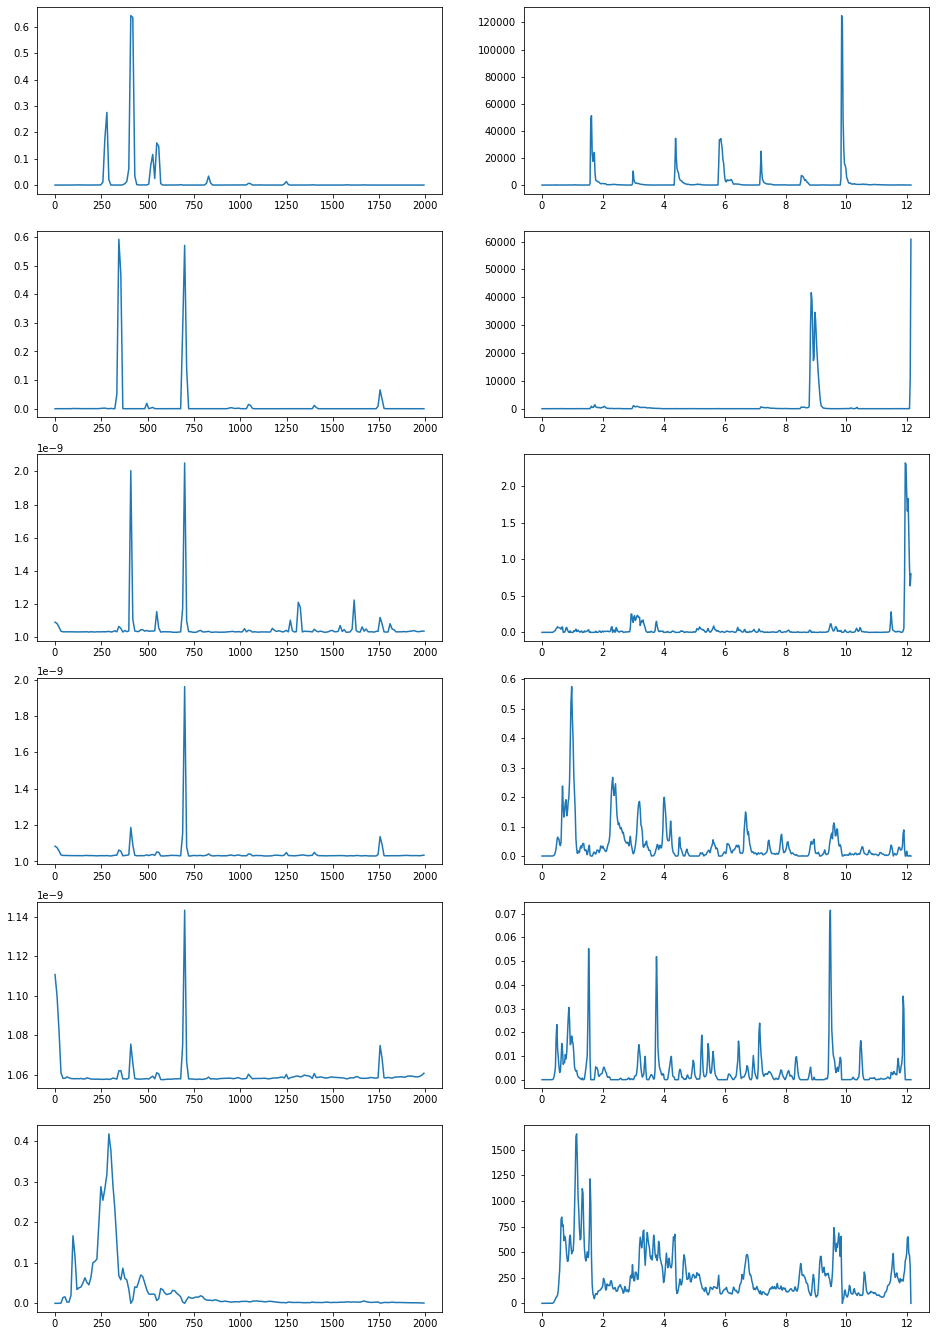

[ 49.   65.   86.6  99.6 107.2 108.4]


In [10]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_MU_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. 65 but what happened with time plot?
3. ???
4. ???
5. ???
6. ???
7. ???

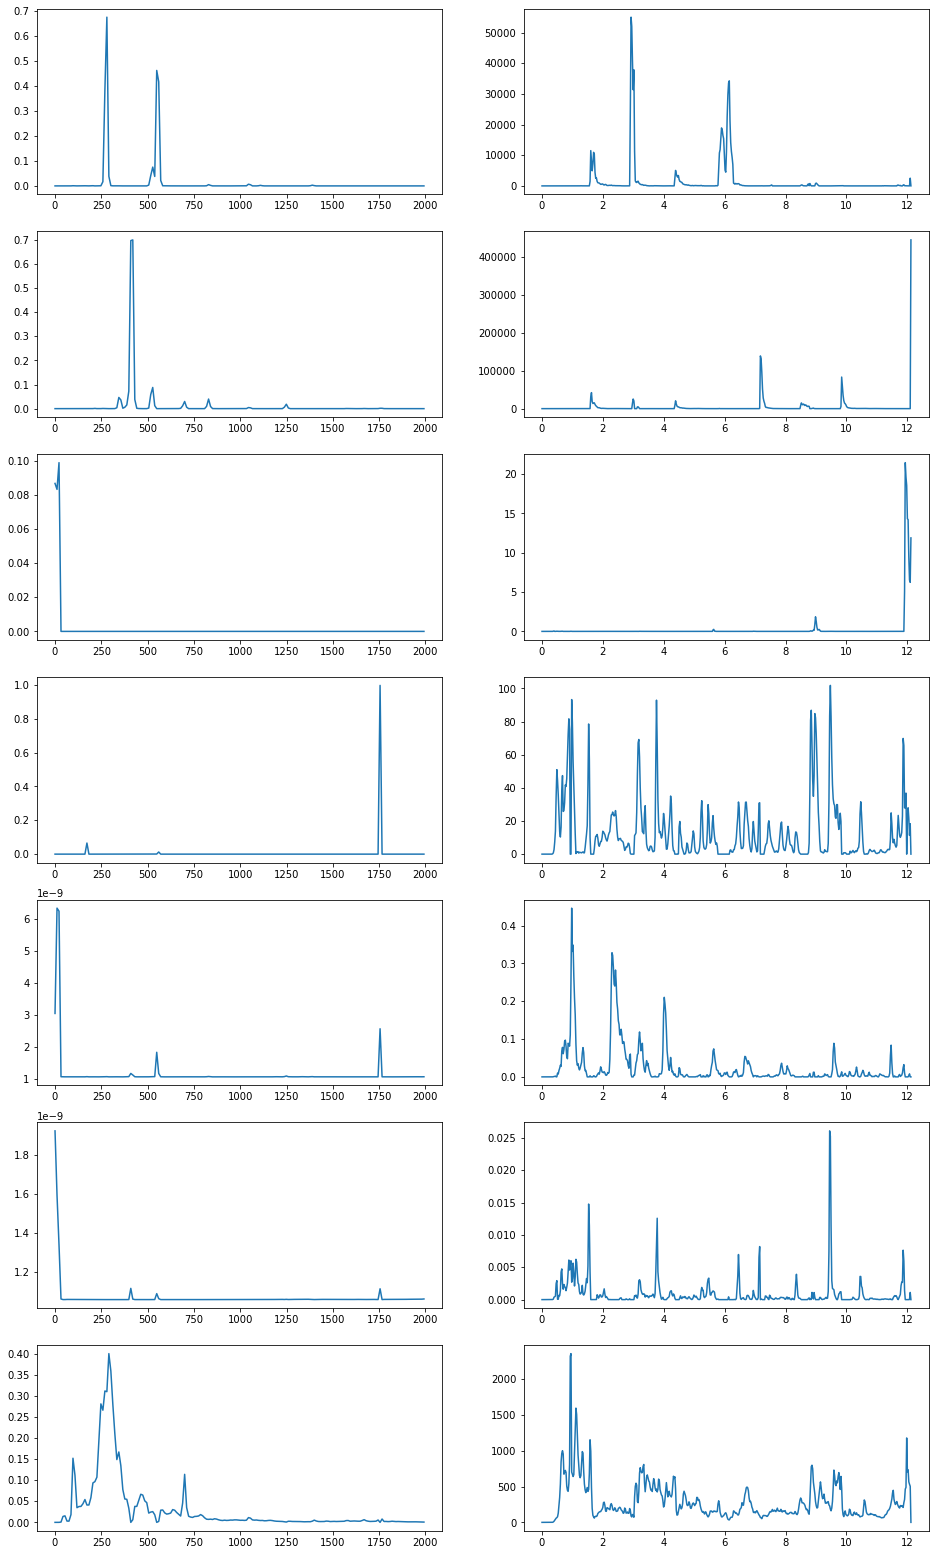

[ 61.   68.   91.8  93.  100.8 104.2 108.4]


In [11]:
K = 7
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_MU_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

**EM_IS_NMF**

Does not converge for 5000 at all...

1. Low frequency noize. Probably note attacks
2. ???
3. ???
4. ???
5. ???


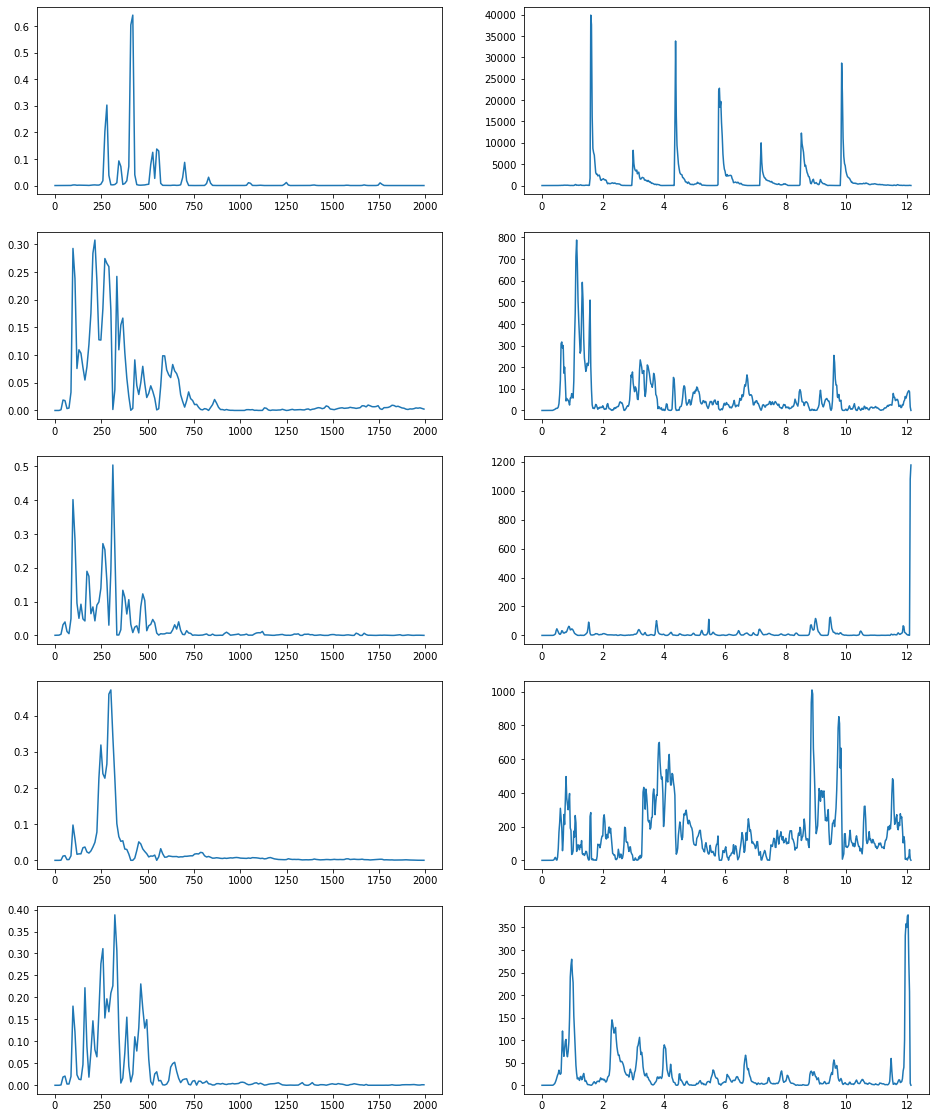

[ 49.  108.4 108.4 108.4 108.4]


In [12]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. ???
3. ???
4. ???
5. ???
6. ???

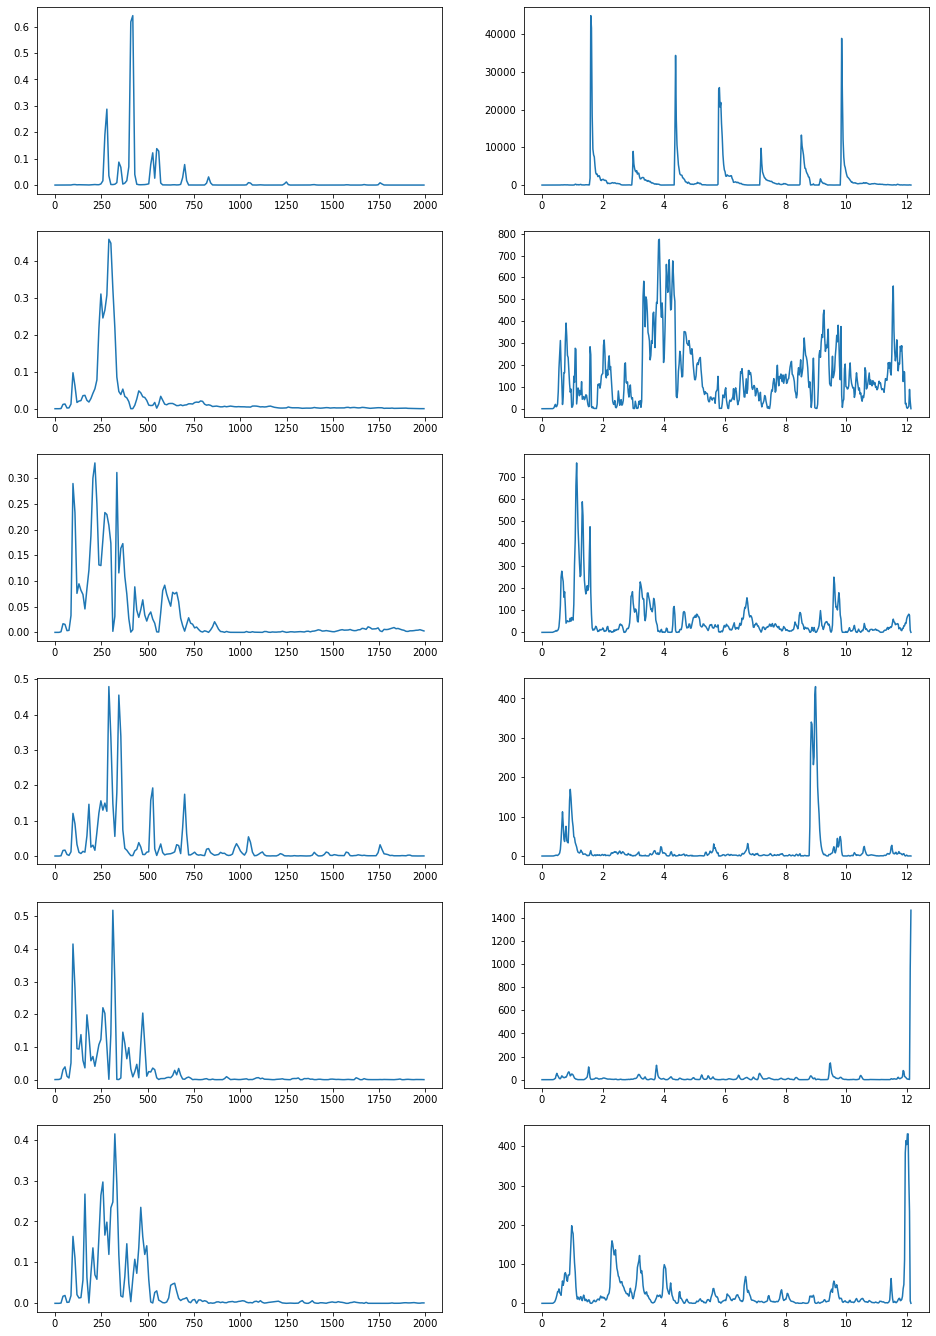

[ 49.  108.4 108.4 108.4 108.4 108.4]


In [13]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. ???
2. Low frequency noize. Probably note attacks
3. ???
4. ???
5. ???
6. ???
7. ???

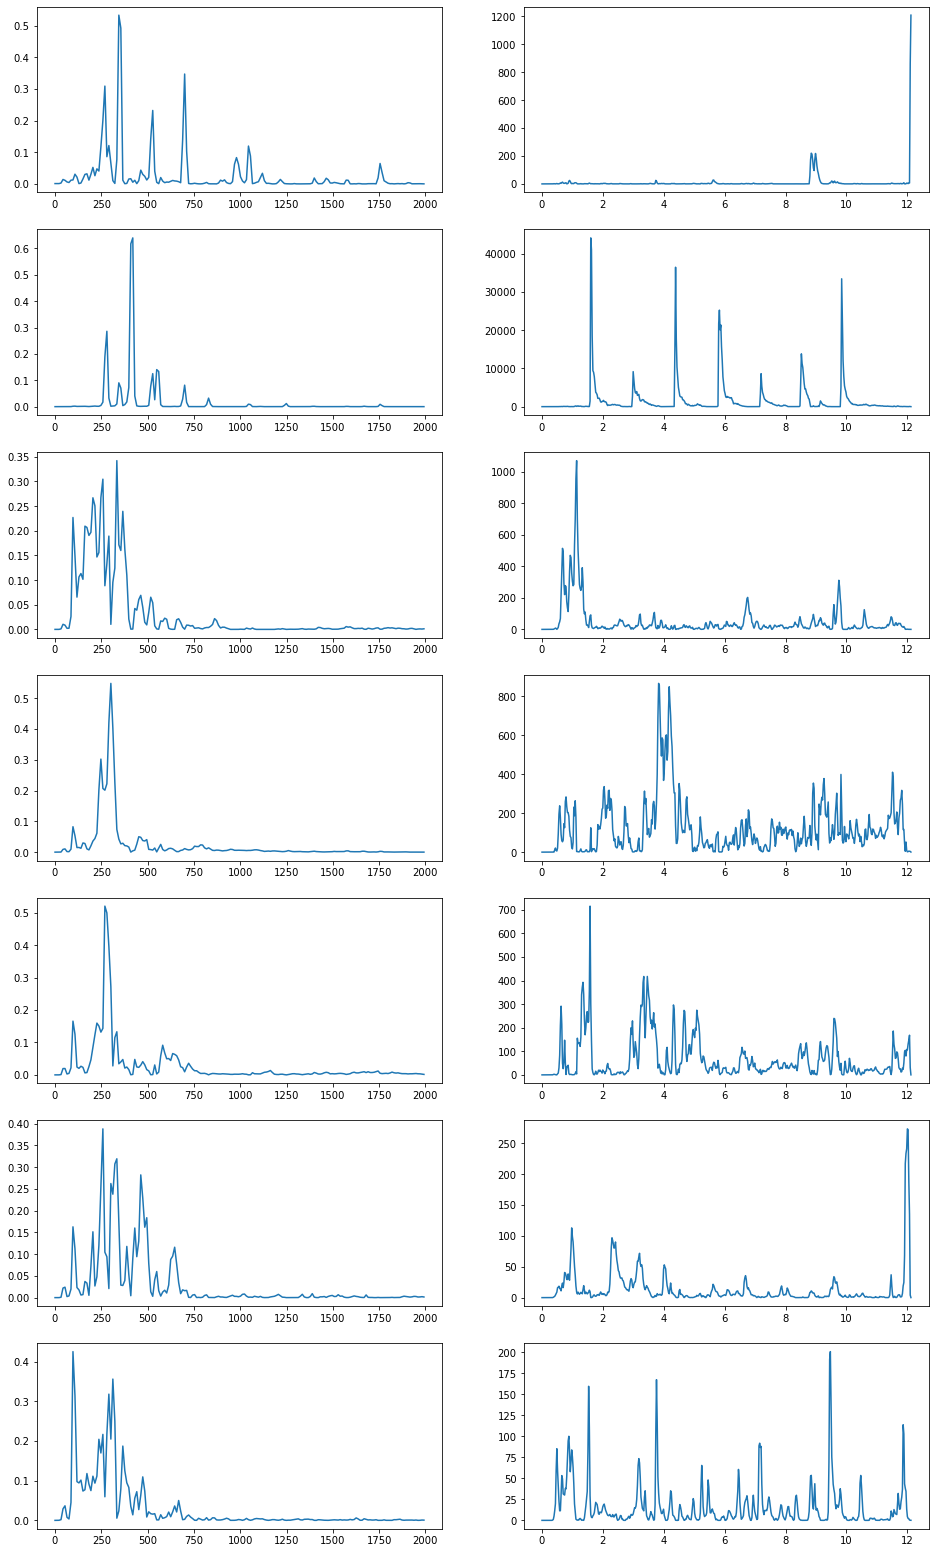

[ 41.   49.  108.4 108.4 108.4 108.4 108.4]


In [14]:
K = 7
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

**R_EM_IS_NMF**

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. ???
3. ???
4. ???
5. ???


/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


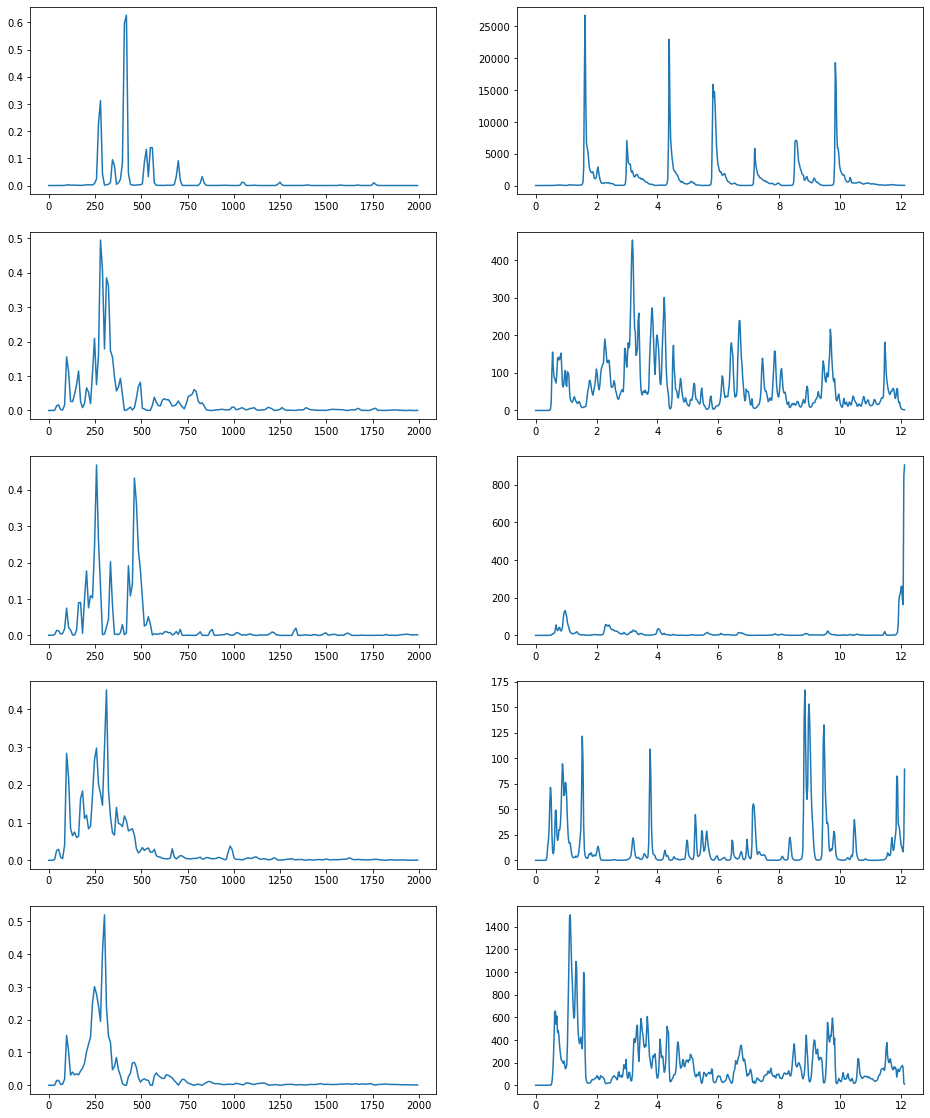

[ 49.  108.4 108.4 108.4 108.4]


In [16]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_R_EM_IS(K, 5000, 10)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. 65 but what happened with time plot?
3. ???
4. ???
5. ???
6. ???

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


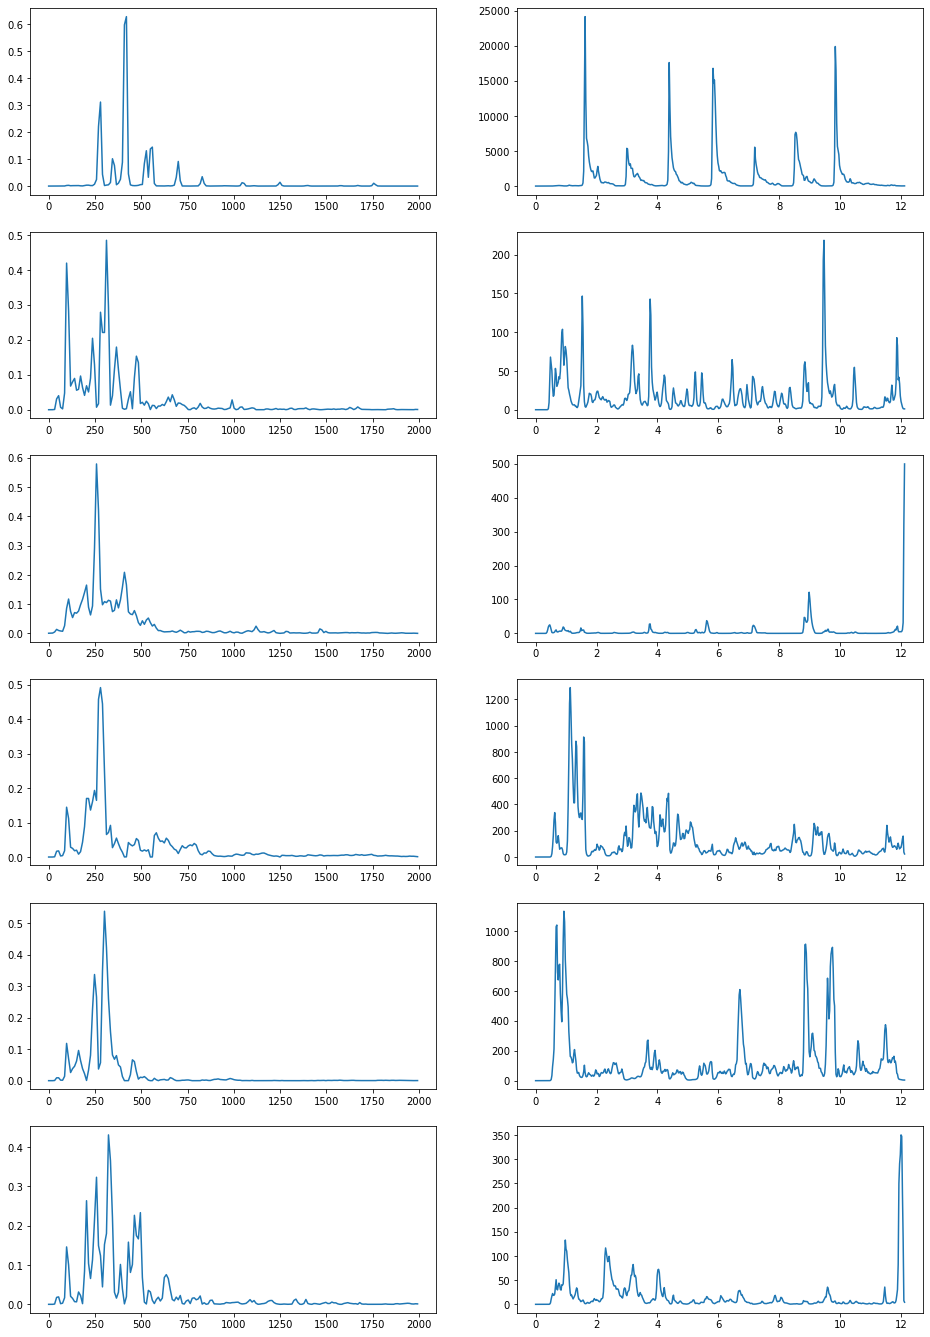

[ 49.  108.4 108.4 108.4 108.4 108.4]


In [17]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_R_EM_IS(K, 5000, 10)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

Does not converge for 5000

1. Low frequency noize. Probably note attacks
2. 65 but what happened with time plot?
3. ???
4. ???
5. ???
6. ???
7. ???

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


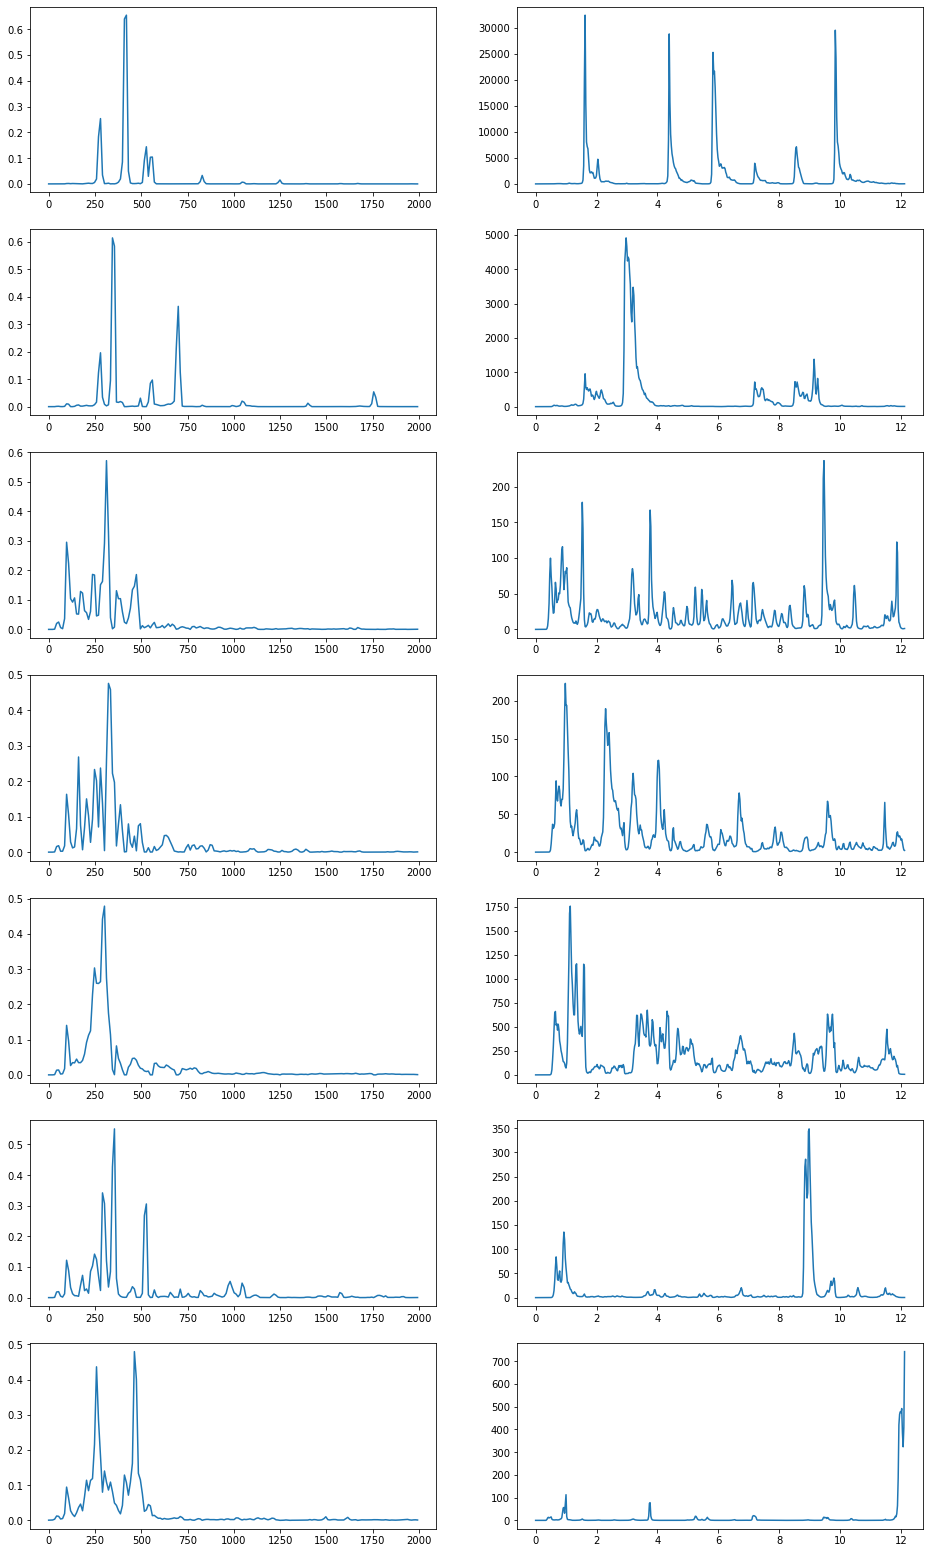

[ 49.   65.  108.4 108.4 108.4 108.4 108.4]


In [18]:
K = 7
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_R_EM_IS(K, 5000, 10)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

**Plotting convergence rates for problematic cases**

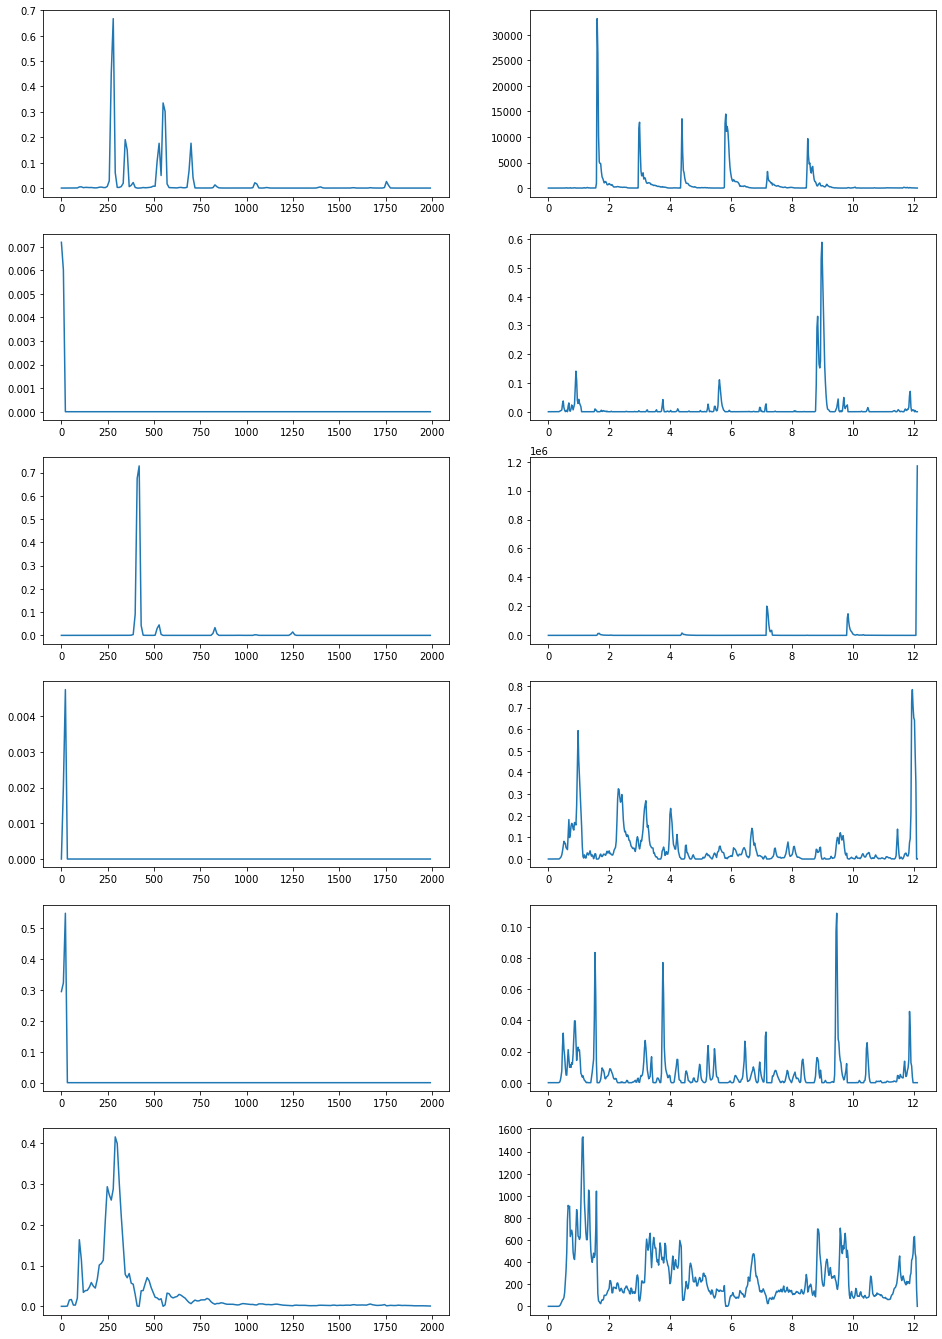

[ 61.   62.6  68.   86.6 106.6 108.4]


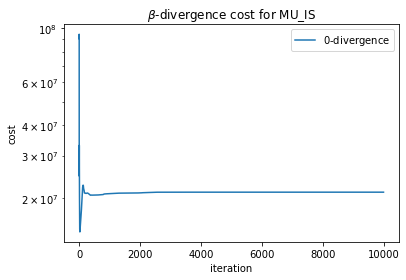

In [19]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_MU_IS(K, 10000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)
matrix_to_factorize.plot_costs("MU_IS", 0)

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


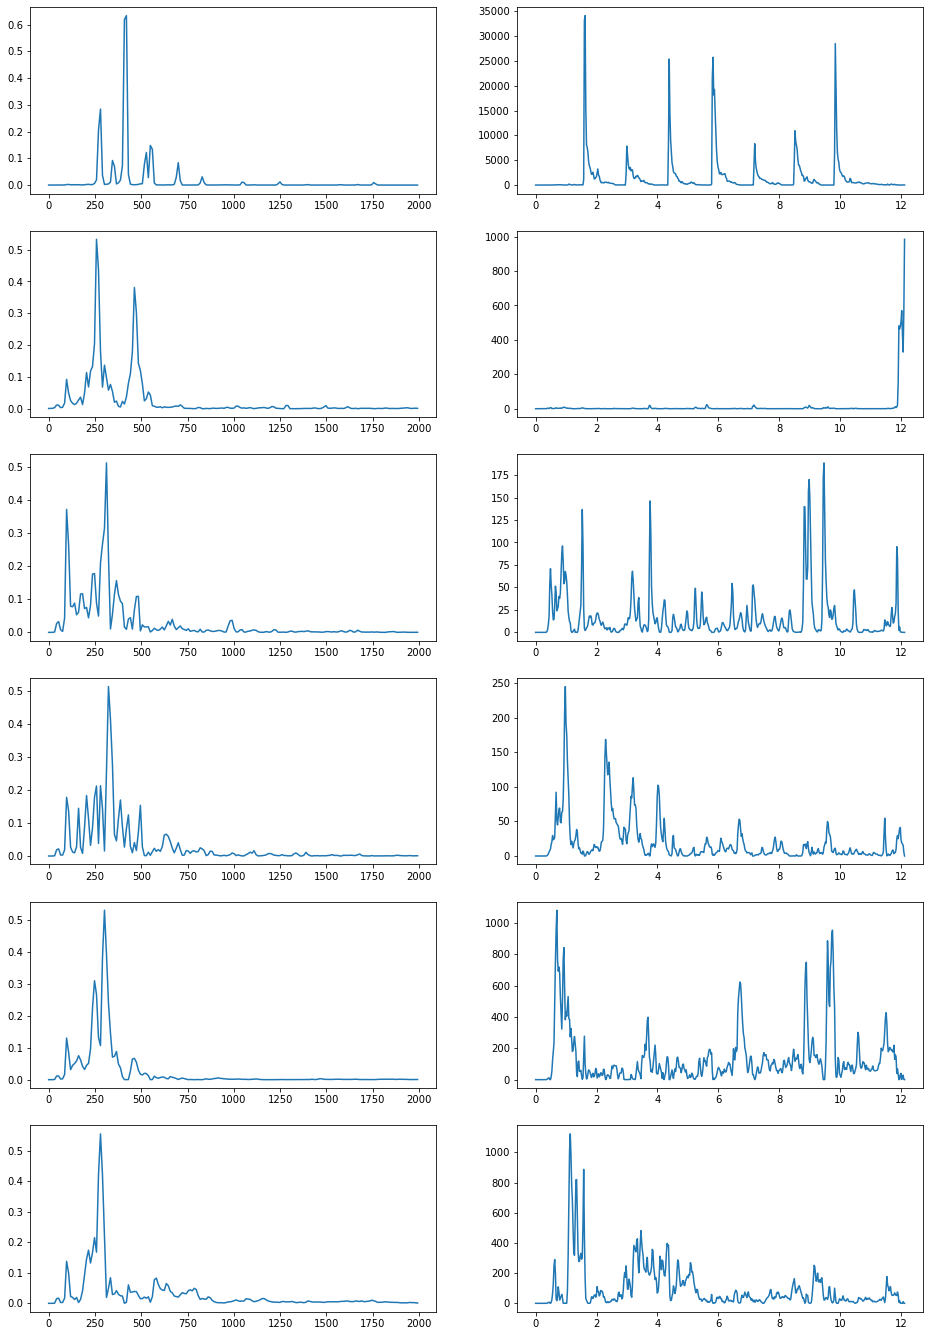

[ 49.  108.4 108.4 108.4 108.4 108.4]


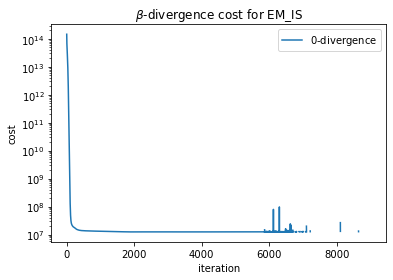

In [20]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(K, 10000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)
matrix_to_factorize.plot_costs("EM_IS", 0)

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1
/home/maria/MachineLearning/NMF.py:338: RuntimeWarning: invalid value encountered in sqrt
  new_h_k = (np.sqrt((p_1 ** 2) - (4 * p_2 * p_0)) - p_1) / (2 * p_2)


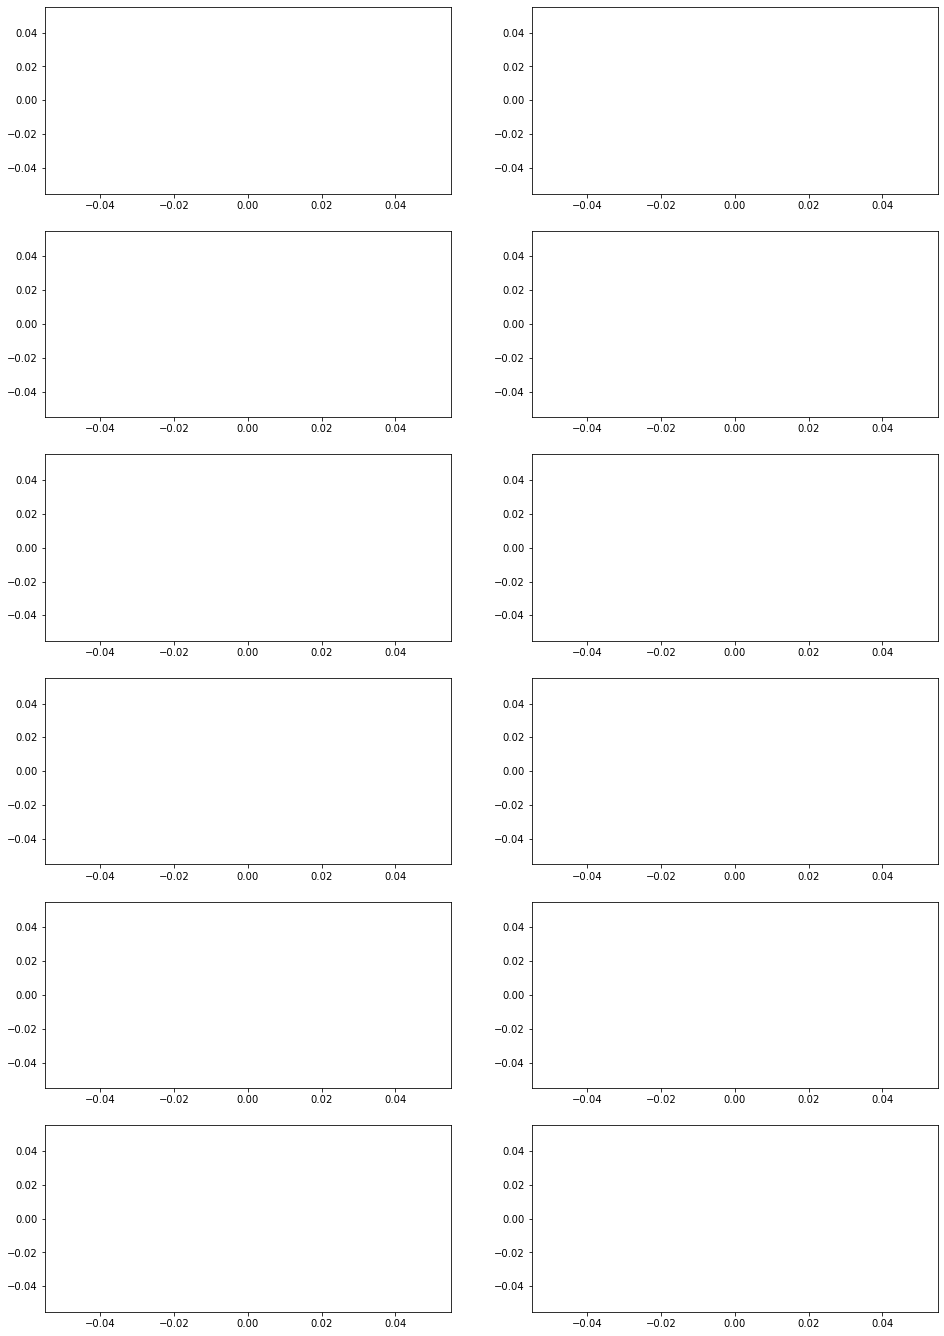

[20.6 20.6 20.6 20.6 20.6 20.6]


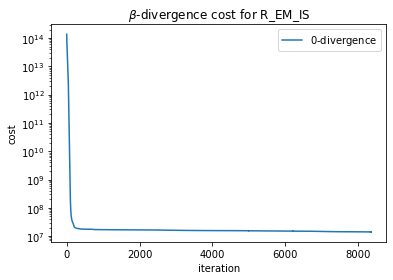

In [22]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_R_EM_IS(K, 10000, 5)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)
matrix_to_factorize.plot_costs("R_EM_IS", 0)

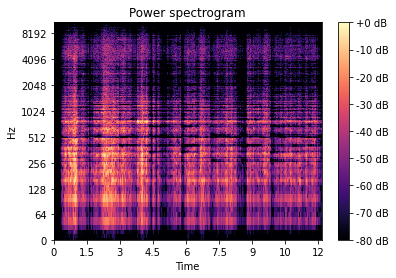

In [5]:
new_spectrogram = Spectrogram(C_matrices[3], ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

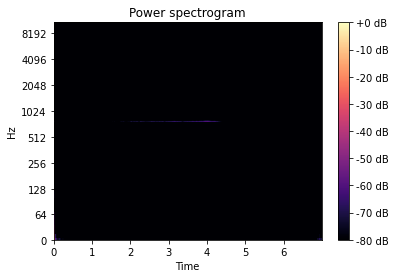

In [4]:
new_spectrogram = Spectrogram(np.sqrt(W @ H), ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")